In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier

In [2]:
raw_data = pd.read_csv('data/all_banks_after2010Q3.csv', index_col = 0)

In [4]:
len(raw_data.index)

7233

In [5]:
raw_set = raw_data.dropna()
len(raw_set)

7119

In [6]:
len(raw_set.loc[raw_set.Target == 1])

137

In [7]:
raw_set.describe()

,Total equity capital,Total assets,Total loans,1-4 family residential loans,Other real estate loans,Commercial and industrial loans,Credit cards,Allowance for loan losses,Total noninterest expense,Net Income before,Total transaction deposits,Total nontransaction deposits,Available-for-sale Fair Value,Number of full-time employees,Target
count,7.119000e+03,7.119000e+03,7.119000e+03,7.119000e+03,7.119000e+03,7.119000e+03,7.119000e+03,7.119000e+03,7.119000e+03,7119.000000,7.119000e+03,7.119000e+03,7.119000e+03,7119.000000,7119.000000
mean,4.979489e+04,4.532735e+05,2.965860e+05,8.478723e+04,1.200103e+05,3.932240e+04,2.230547e+04,8.092773e+03,9.851459e+03,1079.637168,4.794220e+04,2.904648e+05,7.499371e+04,89.705998,0.019244
std,3.499014e+05,2.425418e+06,1.843324e+06,6.452886e+05,4.053811e+05,2.346106e+05,1.367082e+06,1.831259e+05,5.722853e+04,20500.119790,1.121413e+05,1.272101e+06,4.163677e+05,337.698286,0.137392
min,-1.035900e+05,1.459000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.419900e+04,-460501.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.504000e+03,7.205200e+04,4.201050e+04,8.066500e+03,1.286150e+04,3.761500e+03,0.000000e+00,6.120000e+02,1.640000e+03,63.500000,1.335250e+04,4.162950e+04,6.748000e+03,18.000000,0.000000
50%,1.478000e+04,1.479450e+05,9.423500e+04,2.253900e+04,3.867400e+04,1.008200e+04,0.000000e+00,1.529000e+03,3.304000e+03,555.000000,2.639300e+04,8.966900e+04,2.113000e+04,36.000000,0.000000
75%,3.166750e+04,3.205235e+05,2.109615e+05,5.525250e+04,9.841750e+04,2.650100e+04,0.000000e+00,3.928500e+03,7.015000e+03,1614.500000,4.977800e+04,2.145060e+05,5.350550e+04,76.000000,0.000000
max,2.328585e+07,1.436089e+08,1.237239e+08,3.353900e+07,2.200312e+07,1.256838e+07,1.138466e+08,1.529436e+07,4.055160e+06,602276.000000,2.897346e+06,5.418400e+07,2.359900e+07,21645.000000,1.000000


In [8]:
y = raw_set['Target']
X = raw_set.drop(['Target', 'AsOfDate'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train_std,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
log_reg.coef_

array([[-6.4405675 , -0.19897017,  0.5972981 ,  1.22916964,  0.27396814,
         0.52819582,  0.09161907,  0.6740738 , -2.17380453, -1.2280554 ,
        -1.76169523,  1.13966541, -0.68254433,  1.02082728]])

In [15]:
log_reg.score(X_train_std, y_train)

0.9815627743634767

In [16]:
log_reg.score(X_test_std, y_test)

0.9789325842696629

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


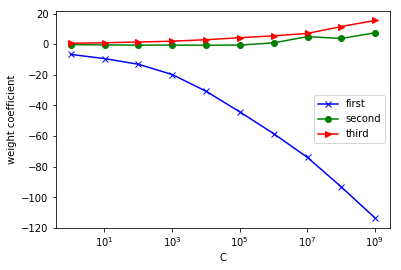

In [17]:
weights, params = [], []
for c in np.arange(0.01, 10): 
    lr = LogisticRegression(C=2**c, random_state=0, solver='lbfgs')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

# Decision region drawing
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x', label='first')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='second')
plt.plot(params, weights[:, 2], color='r',  marker='>', label='third')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [18]:
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_clf.score(X_train_std, y_train)

0.9826163301141352

In [20]:
sgd_clf.score(X_test_std, y_test)

0.9845505617977528

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_std, y_train, cv=3, scoring='accuracy')

array([0.98051606, 0.98209584, 0.97891407])

In [22]:
cross_val_score(log_reg, X_train_std, y_train, cv=3, scoring='accuracy')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.98262243, 0.97946288, 0.98102267])

In [23]:
# Accuracy score is generally not a good performance measure for classifiers, especially when you are dealing with 
# skewed datasets (when some classes are much more frequent than others) -- check with confusing matrix below:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
sgd_y_train_pred = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3)
confusion_matrix(y_train, sgd_y_train_pred)

array([[5565,   20],
       [  91,   19]])

In [24]:
# Same terrible results for logit regression:
log_y_train_pred = cross_val_predict(log_reg, X_train_std, y_train, cv=3)
confusion_matrix(y_train, log_y_train_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[5578,    7],
       [ 101,    9]])

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, sgd_y_train_pred) #SGD precision

0.48717948717948717

In [26]:
precision_score(y_train, log_y_train_pred) #Logit precision

0.5625

In [27]:
recall_score(y_train, sgd_y_train_pred) #SGD precision

0.17272727272727273

In [28]:
recall_score(y_train, log_y_train_pred) #Logit recall

0.08181818181818182

In [29]:
f1_score(y_train, log_y_train_pred)

0.14285714285714285

In [30]:
f1_score(y_train, sgd_y_train_pred)

0.2550335570469799

In [31]:
# Precision/Recall tradeoff 
from sklearn.metrics import precision_recall_curve

sgd_y_scores = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3, method='decision_function')
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train, sgd_y_scores)

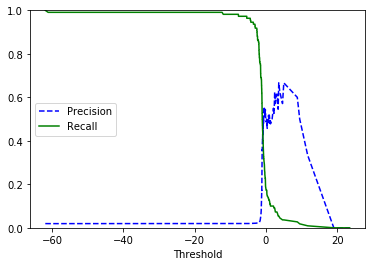

In [32]:
 #Represent Precision and Recall graphically
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])

plot_precision_recall(sgd_precisions, sgd_recalls, sgd_thresholds)
plt.show()

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, sgd_y_scores)

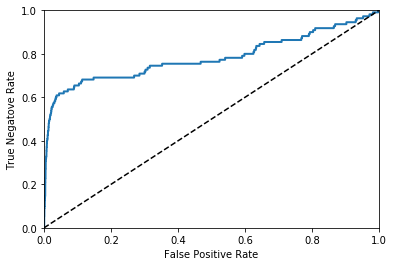

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Negatove Rate')
plot_roc_curve(fpr, tpr)